In [113]:
import pandas as pd

df = pd.read_csv('C:/jhex/jh_ex.py/ex/python_study_group/taxi_train.csv')
df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [183]:
#뉴욕시 안으로 위도,경도 범위 한정
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

#위도 경도를 비교해 뉴욕시 범위의 데이터를 df2로 이동
df2 = df.copy(deep=True)
df2['pickup_datetime'] = pd.to_datetime(df2['pickup_datetime'],errors='coerce')
df2[['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude']] = df2[['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude']].apply(pd.to_numeric,errors='coerce')#에러값 전부 결측값 처리
#str_data에서 float_data로 변경하고 숫자가 아닌 값 결측값 처리
#df2.isnull().sum()#결측값 dropoff_longitude ,dropoff_latitude컬럼에서 각 5개 씩
df2.dropna(axis=0, inplace=True)#결측값이 있는 행 5개 제거
print(df2.dtypes)

print(df2.shape)

#df2 = df2[([df2['pickup_longitude'] > nyc_min_longitude]) & (df2['pickup_longitude'] < nyc_max_longitude)]#이게 왜 에러
#df2 = df2.drop(df2[([df2['pickup_longitude'] < nyc_min_longitude]) & (df2['pickup_longitude'] > nyc_max_longitude)].index)#2

df2 = df2.drop(df2[df2['pickup_longitude'] < nyc_min_longitude].index)
df2 = df2.drop(df2[df2['pickup_longitude'] > nyc_max_longitude].index)
df2 = df2.drop(df2[df2['dropoff_longitude'] < nyc_min_longitude].index)
df2 = df2.drop(df2[df2['dropoff_longitude'] > nyc_max_longitude].index)

print(df2.shape)
df2 = df2.drop(df2[df2['pickup_latitude'] < nyc_min_latitude].index)
df2 = df2.drop(df2[df2['pickup_latitude'] > nyc_max_latitude].index)
df2 = df2.drop(df2[df2['dropoff_latitude'] < nyc_min_latitude].index)
df2 = df2.drop(df2[df2['dropoff_latitude'] > nyc_max_latitude].index)

print(df2.shape)

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object
(499994, 8)
(487660, 8)
(483500, 8)


In [178]:
import matplotlib.pyplot as plt

landmarks={'JFK Airport':(-73.78, 40.643),
          'Laguardia Airport':(-73.87, 40.77),
          'Midtown':(-73.98, 40.76),
          'Lower Manhattan':(-74.00, 40,72),
          'Upper Manhattan':(-73.94, 40.82),
          'Brooklyn':(-73.95, 40.66)}

def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize=(12,12))
    if points=='Pickup':
        plt.plot(list(df.pickup_longitude),list(df.pickup_latitude),'.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude),list(df.dropoff_latitude), '.', markersize =1)
    
    for landmark in landmarks:
        plt.plot(landmarks[landmark][0],landmarks[landmark][1], '*', markersize=15, alpha=1,color='r')#alpha==투명도
        plt.annotate(landmark, (landmarks[landmark][0] + 0.005,
            landmarks[landmark][1] + 0.005), color='r',
            backgroundcolor='w')#plot에 주석달기

    plt.title('{}Locations on NYC Illustrated'.format(points))
    plt.grid(None)
    plt.xlabel('Latitude')
    plt.ylabel('Longtitude')
    plt.show

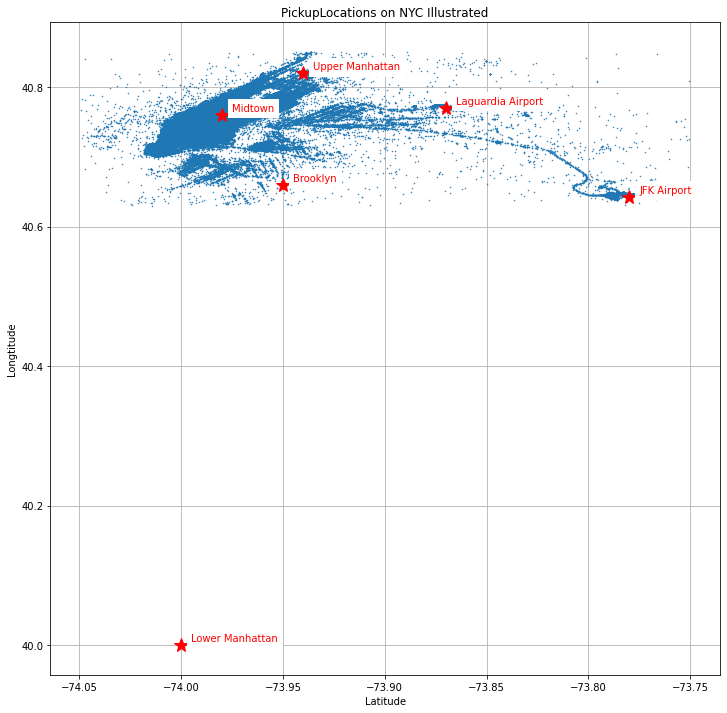

In [179]:
plot_lat_long(df2,landmarks, points='Pickup')

In [188]:
def euc_distance(lat1,long1,lat2,long2):
    return(((lat1-lat2)**2+(long1-long2)**2)*0.5)

df2['distance'] = euc_distance(df2['pickup_latitude'],
                              df2['pickup_longitude'],
                              df2['dropoff_latitude'],
                              df2['dropoff_longitude'])
print(df2['distance'].head())
df2['distance'] = df2[df2['distance']<0.3]['distance']#?
print(df2['distance'].head())


0    0.000045
1    0.003176
2    0.000093
3    0.000321
4    0.000190
Name: distance, dtype: float64
0    0.000045
1    0.003176
2    0.000093
3    0.000321
4    0.000190
Name: distance, dtype: float64
